<a href="https://colab.research.google.com/github/alesepulveda1d/IB_AI_2017856/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7 - CNN**


*  Students:

Pablo Emiliano Martinez Perez ID. 2003785

Andrea Mayela Santos Garcia ID. 1948005

Alejandra Sepulveda Rojas ID. 2017856

Ingrid Edith Martinez Andrade ID. 1995361

*   Career: Biomedical Engineering
*   Group: 002
*   Class: Artificial Inteligence
*   Professor: Daniel Isaías López Páez
*   Hour: Thursday N4-N6


1. Load libraries

In [21]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randint


2. Load data

In [22]:
#Load data from mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()




3. Data preprocessing

In [23]:

train_data, test_data = train_data / 255.0, test_data / 255.0

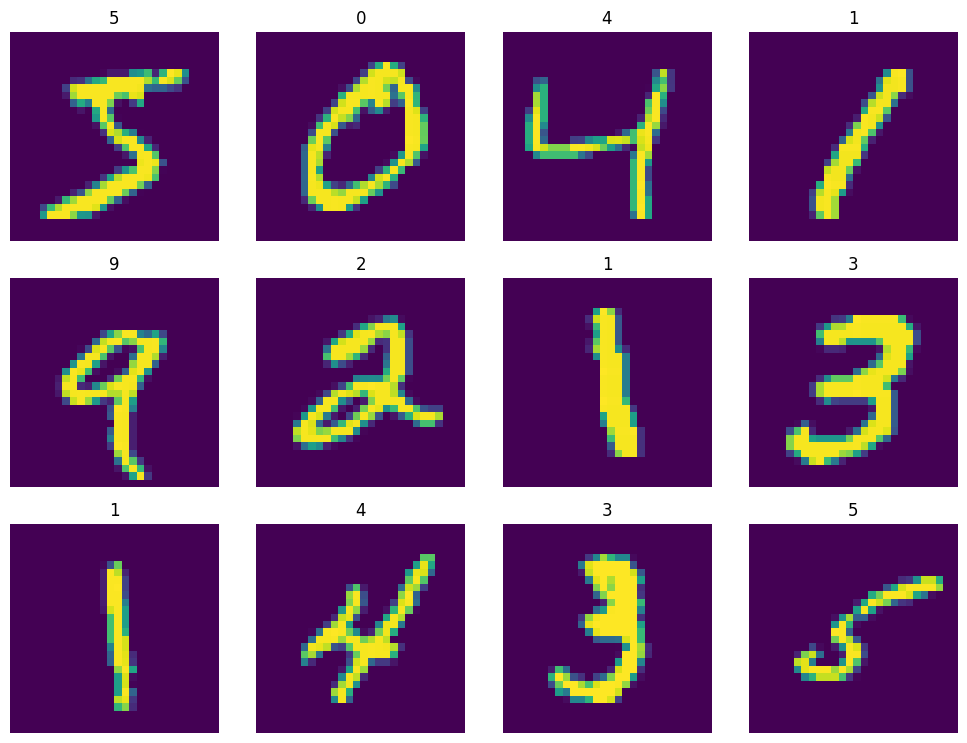

In [24]:
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_data[i])
    plt.title(f"{train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


4. Model selection and training

In [25]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#Training model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=180,
                    validation_data=(test_data, test_labels))


Epoch 1/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 56s 162ms/step - accuracy: 0.8147 - loss: 0.6504 - val_accuracy: 0.9769 - val_loss: 0.0759
Epoch 2/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 83s 165ms/step - accuracy: 0.9749 - loss: 0.0807 - val_accuracy: 0.9845 - val_loss: 0.0492
Epoch 3/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 53s 157ms/step - accuracy: 0.9844 - loss: 0.0507 - val_accuracy: 0.9848 - val_loss: 0.0478
Epoch 4/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 82s 158ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9878 - val_loss: 0.0386
Epoch 5/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 83s 160ms/step - accuracy: 0.9912 - loss: 0.0312 - val_accuracy: 0.9917 - val_loss: 0.0296
Epoch 6/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 84s 167ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accuracy: 0.9899 - val_loss: 0.0317
Epoch 7/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9943 - loss: 0.0196 - val_accuracy: 0.9918 - val_loss: 0.0295
Epoch 8/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 52s 155ms/step - accuracy: 0.9947 - loss: 0

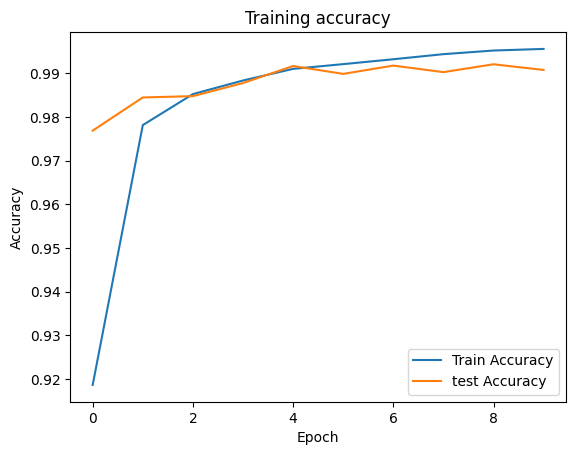

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='test Accuracy')
plt.title("Training accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

5. Model testing

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9879 - loss: 0.0444
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


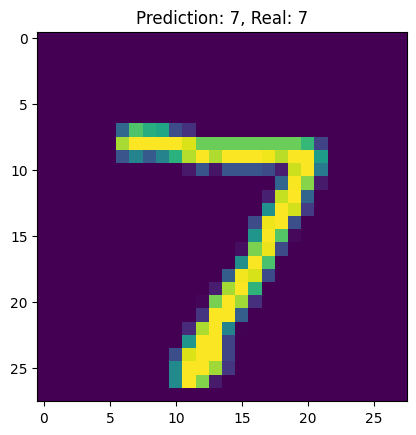

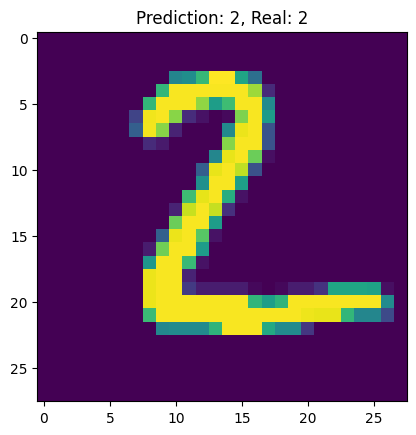

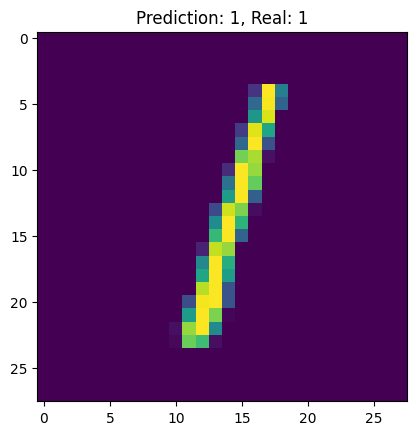

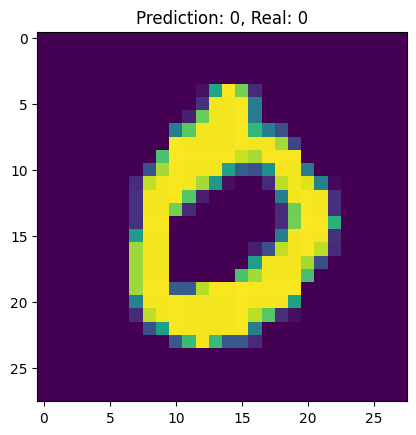

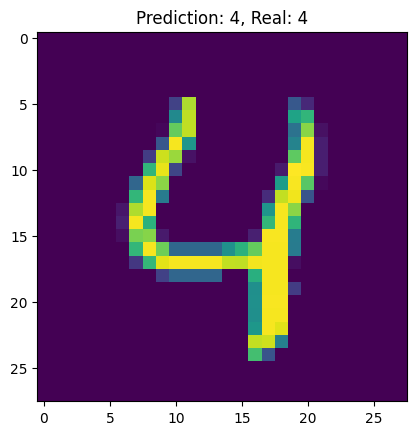

In [20]:
#Testing model
test_loss, test_acc = model.evaluate(test_data, test_labels)

predictions = model.predict(test_data[:5])
for i in range(5):
    plt.imshow(test_data[i].reshape(28, 28))
    plt.title(f"Prediction: {predictions[i].argmax()}, Real: {test_labels[i]}")
    plt.show()






How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?
**In this case, we used 10, with a batch_size of 180**

Did you get a better performance on this assignment or on assignment 6? Why?
**Yes, the performance improved in this assignment because CNNs are specifically designed for image processing tasks. Unlike a simple feedforward neural network, CNNs can capture spatial hierarchies and patterns in images by using convolutional layers.**





